# CE 93: Engineering Data Analysis 
# Fertility Rate and Life Expectancy Among Countries

##### By: *Seobin Yun* and *Connor Clark*

## Libraries Required for Exploratory Data Analysis (EDA)

The code that follows loads in the necessary libraries for analysis

In [38]:
# import python library / packages 
import numpy as np                                 # ndarrays for gridded data
import pandas as pd                                # DataFrames for tabular data
import matplotlib.pyplot as plt                    # plotting
import random                                      # random sampling
from scipy.stats import *                          # common distributions, t-test
import statistics as stats                         # statistics like mode
from sklearn.linear_model import LinearRegression  # linear regression
import statsmodels.api as sm                       # linear regression

## **1. Introduction**

In recent years, earth can expect to introduce an astonishing 140 million
newborns to the new world! Without proper context, one might assume this
number to be extremely large or extremely small, depending on who you ask.
Nonetheless, certain variables should be considered when discussing the topic of
newborns each year, which we will refer to as fertility rate. The variable we will
focus on in relation to the fertility rate will be life expectancy. In this report, we
will analyze the potential relationship between life expectancy and fertility rate
within the United States for given years.
Firstly, let's define our variables to better understand the quantity assigned to
each variable. Fertility rate is define as the number of births per woman, while
the life expectancy is defined as the expected amount of years for that newborn
to live. To set up such a relationship, we have selected two data sets, both from
the CE93 Data Summaries spreadsheet: (1) Fertility Rate (births) and (2) Average
Life Expectancy (yr). The data can be observed or downloaded into a CSV file by
visiting the gapminder website (https://www.gapminder.org/data/), where both
datasets have the year, as columns, along the x-axis, and the country, as rows, In [3]:
along the y-axis, with corresponding values in each cell. Along with the data
itself, the site provides sources from which data was collected to compile the
data set itself. However, we will instead be utilizing the provided data frame,
which merges the two data sets into a single data frame, rather than working
with two separate tables.
We have shown an idea of what you can expect from the datasets below. As one
can observe, the common variable between both data sets is the country along
with the corresponding year, which is where we will perform our analysis.

|Feature|Units|Description|
|:-|:-|:-|
|country|N/A|country name|
|Fertility_rate|births|Average annual birth rate per country|
|Life_expectancy|year|Average lifespan of individuals |



### Raw Data
Here, we have shown the table that will allow us to make calculations in order to
show the relationship, if any, between a country's fertility rate and life
expectancy


In [39]:
# read a .csv file in as a DataFrame
data = pd.read_csv('CE93_08_Fertility_Expectancy.csv')

# returns the first 5 rows of the data set for fertility rate
data.head()


,country,Fertility_rate(births),Life_expectancy(yr)
0,Afghanistan,4.04,63.4
1,Angola,5.41,65.2
2,Albania,1.70,77.9
3,United Arab Emirates,1.69,74.0
4,Argentina,2.23,74.6


Now, we check the shape of data file.

In [40]:
# get the shape (rows, columns)
rows, columns = data.shape
# Print the number of rows and columns
print(f'The Data Frame has {rows} rows, each representing a country, and {columns} columns, where these are the labels for country, Fertility rate, and Life Expectancy.')

The Data Frame has 185 rows, each representing a country, and 3 columns, where these are the labels for country, Fertility rate, and Life Expectancy.


### Country
The country name is simply just the country

In [41]:
country = data['country']
country.head()

0             Afghanistan
1                  Angola
2                 Albania
3    United Arab Emirates
4               Argentina
Name: country, dtype: object

### Fertility Rate
Here, we show the actual data from the csv file below. To make coding and
analysis easier, we have named the data for the fertility rate, fr. At a glance, we
see that the data is of type float64. Here we have shown the first 5 entries of the
data for fertility rate. Note that the ordering for this array goes by alphabetical
order in accordance with the country.


In [42]:
fr = data['Fertility_rate(births)']
fr.head()

0    4.04
1    5.41
2    1.70
3    1.69
4    2.23
Name: Fertility_rate(births), dtype: float64

### Life Expectancy
Similarily, we have shown the actual data for the life expectancy csv file below,
and have named the variable le. Again, the number of entries for life expectancy
will be equal to the number of entries of countries and fertility rate. We have
outputted the first 5 entries of the data set, where the ordering again is
alphabetical by country

In [43]:
le = data['Life_expectancy(yr)']
le.head()

0    63.4
1    65.2
2    77.9
3    74.0
4    74.6
Name: Life_expectancy(yr), dtype: float64

### Separation of Variables 
Separating out the data into two different arrays allows for data to be done with
ease. Instead of having to do matrix math or algebra in python, we simplify our
calculations by reducing the data down to their own arrays. In this format, we
can identify statistics for each data set, visualize a specific variable to observe
it's behavior in relation to another, and we can determine any independence or
dependence between the two variables. Nonetheless, a short and simple way to
achieve some basic statistics has been down below, where we have used the
describe function to output various summaries for each data set.

In [44]:
# data.info()
data.describe()

,Fertility_rate(births),Life_expectancy(yr)
count,185.000000,185.000000
mean,2.661676,72.394595
std,1.234484,6.734505
min,1.230000,52.000000
25%,1.730000,67.300000
50%,2.200000,73.200000
75%,3.490000,77.000000
max,7.000000,84.900000


## **2. Summary Statistics**

Now, we calculate summary statistics including **measures of central tendency** and **measure of variability** for each column. (fertility rate and life expectancy)

##### *Measures of central tendency*
1. Mean
2. Median

##### *Measures of variability*
1. Variance
2. Standard deviation
3. Coefficient of variation

### <span style="color:blue">Fertility Rate</span>


First of all, we're gonna calculate the worldwide mean of fertility rate. To calculate the mean of fertility rate as a whole, we'll simply take our data for fertility rate, add each value in the array together, and divided by the length, or number of entries, of the array. Another simple way to do this is by simply using **data.mean**, which is what we have down below.

In [45]:

fertility_mean = fr.mean()
print(f'Mean of Fertility rate is {fertility_mean.round(2)} births.')

Mean of Fertility rate is 2.66 births.


Next, we'll take the worldwide median of fertility rate, which is the exact middle
value of all entries when the array in ordered from smallest to largest value.
Again, for simplicity, we have utilitized the function data.median, to do the
work for us.

In [46]:

fertility_median = fr.median()
print(f'Median of Fertility rate is {fertility_median.round(2)} births.')

Median of Fertility rate is 2.2 births.


We can analyze that mean of fertility rate (2.66) births is higher than median of fertility rate (2.2 births). Being that the mean of the fertility rate is higher than the median, this indicates that there are outliers within the data. Whenever the mean is greater than the median, the outlier will be of larger value, as larger values increase the average of a data set, while barely affecting the median, if at all. Therefore, we can conclude that this fertility rate data is **right skewed (positively skewed)** and **median** is the best measure of central tendency.

Next, we calculate Variance for the fertility rate. Variance is the measure of dispersion of a specific value from the data set's average

In [47]:

fertility_var = fr.var()
print(f'Variance of Fertility rate is {fertility_var.round(2)} square births.')

Variance of Fertility rate is 1.52 square births.


Calculate standard deviation by each country and each year.

In [48]:

fertility_stdev = fr.std()
print(f'Standard deviation of Fertility rate is {fertility_stdev.round(2)} births.')

Standard deviation of Fertility rate is 1.23 births.


Calculate the coefficient of variation of fertility rate.

In [49]:
fertility_cv = fertility_stdev / fertility_mean

print(f'Coefficient of variation of Fertility rate is {fertility_cv.round(2)}')

Coefficient of variation of Fertility rate is 0.46


We believe that **the Standard Deviation** is the best measure of variability for the fertility rate dataset. This is because it represents the average size of the distances between data points and the mean, and its units match those of the dataset, making interpretation easier.

### <span style="color:blue">Life_expectancy</span>


First, we will make use of our separated data set for life expectancy and use it to
calculate the worldwide average for life expectancy.


In [50]:

life_mean = le.mean()
print(f'Mean of life expectancy is {life_mean.round(2)} years')

Mean of life expectancy is 72.39 years


Now, we'll use the **.median()** function to calculate the median life expectancy in
the world. From these calculations, we will be able to make some early
conclusions about the data just from these two calculations alone.


In [51]:

life_median = le.median()
print(f'Median of life expectancy is {life_median.round(2)} years')

Median of life expectancy is 73.2 years


We can analyze that median of life expectancy (73.2 years) is higher than mean
of life expectancy (72.39 years). This shows that outliers are on the lower end of
the the range, below the median. This will bring the average life expectancy
down in return. Thus, we can conlcude that this life expectancy data is **left-skewed(negatively skewed)** and **median** is the best measure of central tendency.

Now, we'll make our calculation for the variance of life expectancy.


In [52]:

life_var = le.var()
print(f'Variance of life expectancy is {life_var.round(2)} years**2')

Variance of life expectancy is 45.35 years**2


Being that the variance of life expectancy is in year squared, we can not make
relevant conclusions, as the units are do not hold any value. Thus, we'll take the
standard deviation of the data to get a better understanding of the variability in
our life expectancy data set.

In [53]:

life_stdev = le.std()
print(f'Standard deviation of life expectancy is {life_stdev.round(2)} years')

Standard deviation of life expectancy is 6.73 years


In [54]:
life_cv = life_stdev / life_mean

print(f'Coefficient of variation of life expectancy is {life_cv.round(2)}.')

Coefficient of variation of life expectancy is 0.09.


We believe that **the Standard Deviation** is the best measure of variability for the fertility rate dataset. This is because it represents the average size of the distances between data points and the mean, and its units match those of the dataset, making interpretation easier.

Now, we will make a new variable ***Life_expectancy(month)*** that converts the unit of life expectancy **from years(X) to months(Y)**.
- X: Life_expectancy(yr)
- Y: Life_expectancy(month)

The converting equation is as below: 
$ Y = X*12 $

In [55]:
data['Life_expectancy(month)'] = data['Life_expectancy(yr)']*12
data.head()

,country,Fertility_rate(births),Life_expectancy(yr),Life_expectancy(month)
0,Afghanistan,4.04,63.4,760.8
1,Angola,5.41,65.2,782.4
2,Albania,1.70,77.9,934.8
3,United Arab Emirates,1.69,74.0,888.0
4,Argentina,2.23,74.6,895.2


In [56]:
lem = data['Life_expectancy(month)']
lem.head()

0    760.8
1    782.4
2    934.8
3    888.0
4    895.2
Name: Life_expectancy(month), dtype: float64

Now, we will calculate one measure of central tendency and one meausre of variability.

- *mean*
- *standard deviation*

In [57]:
le_month = data['Life_expectancy(month)']
life_mean_month = le_month.mean()
print(f'Mean of life expectancy is {life_mean_month.round(2)} months')

Mean of life expectancy is 868.74 months


In [59]:

life_month_stdev = le_month.std()
print(f'Standard deviation of life expectancy is {life_month_stdev.round(2)} months')

Standard deviation of life expectancy is 80.81 months


Since X and Y are in **a linear relationship**, we can compute the mean and standard deviation of the new variable Y using the mean and standard deviation of X.

## **3. Visualizations**

#### Histogram Distrubution of Life Expectancy
To illustrate the distributions of life expectancy worldwide, the most useful way to visualize this type of distrubtion is with a histogram. 

To retrieve the worldwide data for life expectancy, we called on the column from the original data frame which contained every country's life expectancy in an array. 
We called this array **le**. 

Once the data is in an array, plotting the data becomes much easier. 

In plotting a histogram, the values of our actual data will be plotted along the x-axis, which in our case is the life expectancy in years, while the frequency at which each value occurs will be plotted along the y-axis, which is just the number of times a certain life expectancy value occurred in the data. 

It's useful to note that while these the life expectancy is a discrete variable, creating a bin with a length of 1 year would create an extreme amount of noise in the historgram. 

To reduce the amount of noise, we decided to set the number of bins at 20, which allows for better interpretation of the histogram

### Histogram of Life Expectancy and Fertility Rates

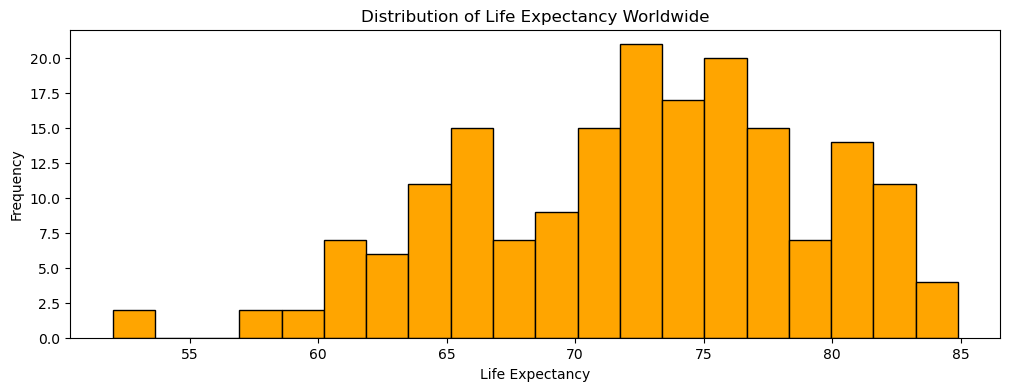

In [60]:
fig1, ax1 = plt.subplots(nrows = 1, ncols = 1, figsize = (12,4))
# Plot histogram
ax1.hist(le, bins=20, color='orange', edgecolor='black')
ax1.set(title = 'Distribution of Life Expectancy Worldwide',
           xlabel = 'Life Expectancy',
           ylabel = 'Frequency',
          )
plt.show()


#### Variability of Life Expectancy from Mean
In the previous section, we concluded that the data for life expectancy was leftskewed, or negatively skewed, but that was just us telling you without any
context or visualization, and hoping you'd take it as it is. To get a better
understanding of why the data for life expectancy is negatively skewed, we have
shwon a scatter plot of the life expectancy versus difference from the mean. In
short, this graphic will show how far, positively or negatively, each value of life
expectancy is from the mean. While there are other ways to create this type of
visualization, this scatter plot allows one to visibily observe the outliers in the
data. For ease, we have also indicated the 0 point mark on the y-axis as the
mean. Data points that intersect this red line are the average. Data points above
the average are points that have brought the average up, while data points
below the red line are points that have brought the average down. In observing
the graph, we can see that a lot of the data points do remain close to the red
line, but as one ventures in either direction, the data points become further and
further from the red line. We also see that there are two main outliers between
the 50 and 55 year range. These two outliers can be recognized as the reason for
the negatively skewed data.


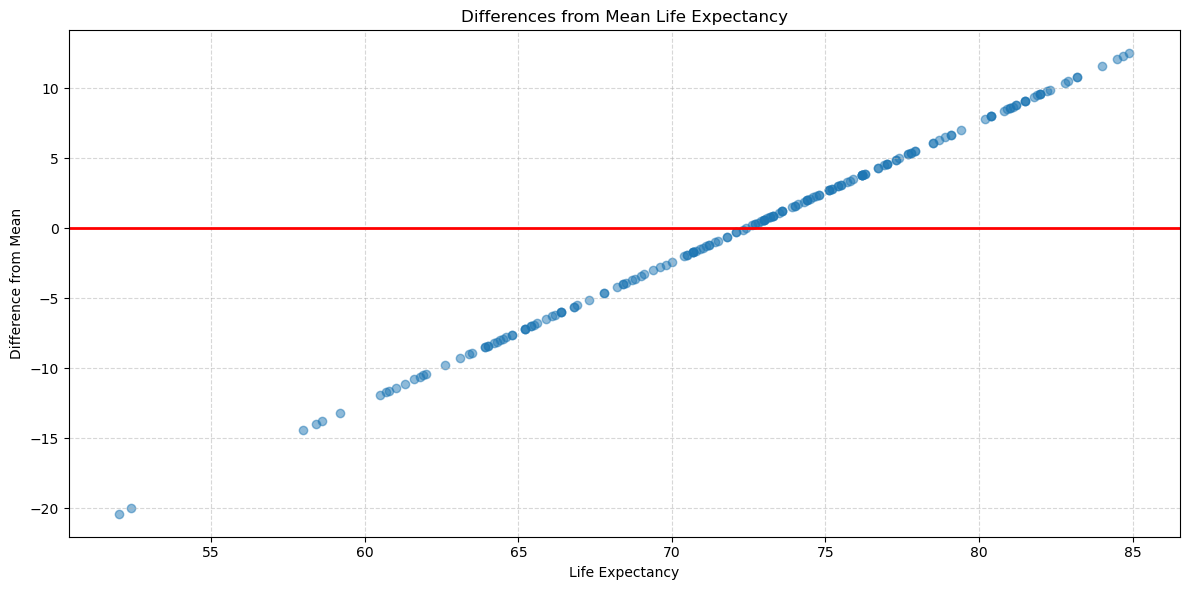

In [61]:
mean_le = np.mean(le)
countries = data['country']
# Calculate the absolute difference between each life expectancy value and the mean
absolute_differences = (le - mean_le)

# Plot scatter plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.scatter(le, absolute_differences, alpha=0.5)

plt.title('Differences from Mean Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Difference from Mean')  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-', linewidth=2)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


#### Box Plot of Life Expectancy and Fertility Rate
In plotting the box plots, we are able to visual the median life expectancy
worldwide, as well as the range of values. This view allows us to view where 50%
of the data lies, bewteen the 1st Quartile and the 3rd Quartile, or the 25
percentile and the 75th percentile. This type of set up allows for comparison
between different country's as well. In the raw data file, there was data included
over a range of years for each country. Instead of simply one value per country,
each country had one value for each year for life expectancy. With that type of
data, one could create a boxplot for each country to show the range, median,
and Inter Quartile Range (IQR) for each country. One could also do this to
compare life expectancy by year, instead of country, as well. However, being
that our merged data set only contained one value for each country, the best
visualization for for this boxplot was to show the life expectancy as a whole
across the world

[Text(0.5, 1.0, 'Boxplot of Life Expectancy'),
 Text(0, 0.5, 'Life Expectancy (years)')]

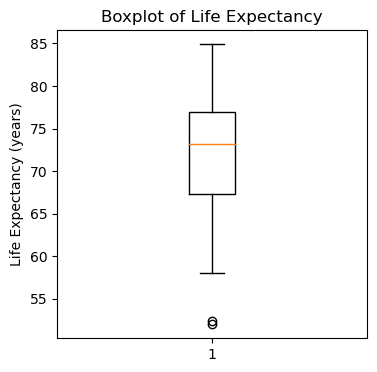

In [62]:

fig3, ax3 = plt.subplots(nrows = 1, ncols= 1, figsize=(4,4))
ax3.boxplot(le)
ax3.set(title='Boxplot of Life Expectancy',
           ylabel = 'Life Expectancy (years)')


### Scatter plot between fertility rate and life expectancy

We're gonna create a scatter plot between fertility rate and life expectancy using **scatter() method** in matplotlib.

X label indicates fertility rate and Y label indicates life expectancy. 

We set a marker style as a star and a line color as <span style="color:green">green</span>. 

Text(0, 0.5, 'Life Expectancy (yr)')

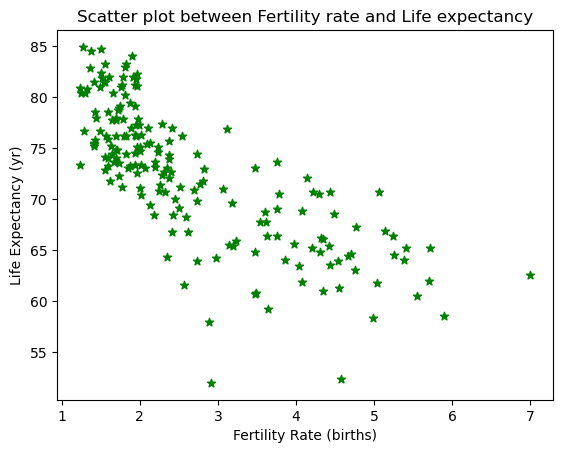

In [63]:
plt.scatter(x= data['Fertility_rate(births)'], y= data['Life_expectancy(yr)'], c= 'g', marker='*')

plt.title('Scatter plot between Fertility rate and Life expectancy')
plt.xlabel('Fertility Rate (births)')
plt.ylabel('Life Expectancy (yr)')

There is **a negative association**, meaning, as fertility rate tend to decrease, life expectancy tend to increase, on average. While this may seem
counterintuitive, the data suggests that there appears to be a somewhat strong,
negative association between the two. But how strong of an association is there
between these two variables? We'll discuss this in the next section.


## **4. Independence**

We're gonna compute two measures of dependence/independence between fertility rate and life expectancy.
 

1. ***correlation coefficient***
2. ***covariance***

First of all, we're gonna calculate a **correlation coefficience** using **numpy corrcoef() method**. Parameter x is fertility rate and parameter y is life expectancy.

Since the result of .corrcoef() is matrix, the correlation coefficient between the two data is obtained by specifying row and column values(**[0][1]**).

In [64]:
correlation_coefficience = np.corrcoef(x= data['Fertility_rate(births)'], y= data['Life_expectancy(yr)'])
print(f'A correlation coefficient between Fertility rate and Life expectancy is {correlation_coefficience[0][1].round(2)}.')

A correlation coefficient between Fertility rate and Life expectancy is -0.76.


A correlation coefficient of `-0.76` indicates ***a strong negative linear relationship*** between the two datasets. This means that as one dataset increases, the other dataset tends to decrease. This suggests that the more
children a woman births, the lower the life expectancy. Now, there are of course
other factors that go into such a relationship. Factors like health, resources,
education, and many others can all be contributing factors to life expectancy.
However, being that we are only analyzing the relationship between fertility rate
and life expectancy, these are the conclusions that we can make as of now.

The closer the correlation coefficient is to -1, the stronger the negative linear relationship between the variables. 

Therefore, a correlation coefficient of -0.76 suggests a strong negative linear association between the two variables.

Next, we're gonna caculate **a covariance** between fertility rate and life expectancy using **numpy cov() method**. 
Parameter x is fertility rate and parameter y is life expectency.

Since the result of .cov() is matrix, the covariance between the two data is obtained by specifying row and column values(**[0][1]**).

In [65]:
covariance = np.cov(data['Fertility_rate(births)'], y= data['Life_expectancy(yr)'])
print(f'A covariance between Fertility rate and Life expectancy is {covariance[0][1].round(2)}')

A covariance between Fertility rate and Life expectancy is -6.35


A covariance of `-6.35` between two datasets indicates ***a strong negative linear relationship*** between them. 

This means that as one dataset increases, the other dataset tends to decrease. 

The negative covariance suggests an inverse relationship between the variables. 
